# A modelem teljesítményéről...
# ELŐNYE:
## Az én hardveremen 1s 6ms alatt lefut a kód betanítása (mivel csak egyetlen egy korszak van a modellemben), és plusz 0s 13ms alatt a következtetéssel is megvan. Tehát viszonylag rövid idő alatt képes 10-11-es középértékes abszolút hibával egyenest illeszteni a ponthalmazokra. Ez szerintem jobban megéri, mint majdnem 100-szor ennyi idő alatt 8-9-es MAE-t produkálni.
# HÁTRÁNYA:
## Nagyon sok neuron, a gyorsasága a pontosság rovására ment.

## Importáljuk a megfelelő python könyvtárakat

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Beolvassuk az adatokat

In [15]:
data = np.genfromtxt('https://raw.githubusercontent.com/kaustubholpadkar/Linear_Regression-Gradient_Descent-Octave/master/data.csv', delimiter=',')
X = data[:, 0]
y = data[:, 1]

## Létrehozzuk a neurális hálózatunkat

### Én egy félmillió neuronból álló mish aktivációs függvénnyel rendelkező bemeneti réteget és egyetlen egy egy neuronos kimeneti réteget terveztem. A mish aktivációs függvény előnye, hogy gyorsan csökkenti a hibafüggvényt, hátránya hogy viszont gyors csökkenés után már nem nagyon csökkenti...

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(500000, activation='mish', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

## Lefordítjuk a modelt a megadott optimizátorral, veszteségfüggvénnyel és metrikval

### Az adagrad optimalizátor lehet nem olyan pontos mint az adam, de jobban illik a mish aktivációs függvényhez (a legelején nagy ütemben le tudja csökkenteni a hibafüggvényt).

In [17]:
model.compile(
    optimizer='adagrad',
    loss='mse',
    metrics=['mae']
)

## Modell tanítása

### Egyetlen egy epoch alatt betanulja a modellem mindent is!!! A batch méretét regressziós feladatoknál érdemes minnél kisebbre venni.

In [18]:
history = model.fit(
    X, y,
    epochs=1,
    verbose=1,
    batch_size=1
)

100/100 [==============================] - 1s 6ms/step - loss: 206.8780 - mae: 11.1113


## Következtetések

In [19]:
X_pred = np.arange(25, 75)
y_pred = model.predict(X_pred)

2/2 [==============================] - 0s 13ms/step


## Eredeti adatok és predikció megjelenítése

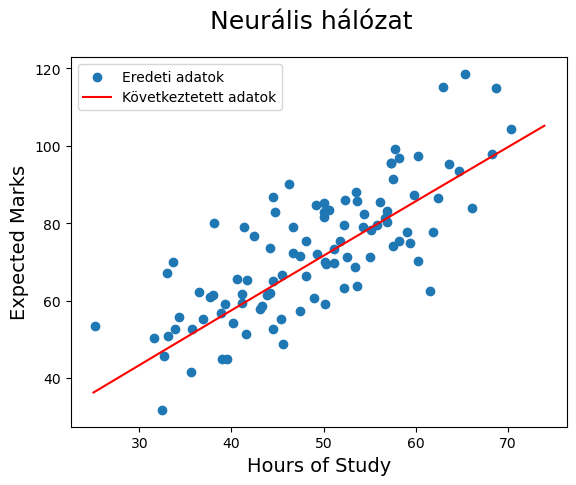

In [25]:
fig = plt.figure()
plt.scatter(X, y)
plt.plot(X_pred, y_pred, 'r')
fig.suptitle('Neurális hálózat', fontsize=18)
plt.xlabel('Hours of Study', fontsize=14)
plt.ylabel('Expected Marks', fontsize=14)
plt.legend(['Eredeti adatok', 'Következtetett adatok'])
plt.show()